In [1]:
%pip install torch matplotlib numpy scipy --quiet


Note: you may need to restart the kernel to use updated packages.


# 22.10. Statistics

## A. General

### 1. Introduction

Deep learning systems process vast amounts of data during training, and without statistical reasoning, it becomes difficult to judge whether observed changes in accuracy, loss, or generalization are meaningful. Statistics are tools to quantify uncertainty, evaluate estimates, and make principled decisions.

Today, statistics encompasses the collection, processing, analysis, interpretation, and visualization of data. 


### 2. Problem Statement
**Model parameters** and **Performance metrics** fluctuate during training. Which fluctuations or improvements does significant and reflect true patterns? 


### 3. Applications in Computer Science
Some example applications:
- **Model evaluation**: Comparing estimators by using statistical bias, standard deviation, and mean squared error (MSE).
- **A/B Testing for Software and Product Features**: Hypothesis testing determines whether Version B is significantly better than Version A.
- **Uncertainty quantification**: Constructing confidence intervals quantify uncertainty in accuracy or loss.

### 4. Scheme
This section introduce 3 types of statistics inference methods:
1. Evaluating and comparing estimators
2. Conducting hypothesis tests.
3. Constructing confidence intervals.


## B. Main Part

**Assumptions:**
1. The _true parameter_ is $\theta$ of given population
2. First, $\theta$ is a scalar value. The extended version of $\theta$ is a vector or a tensor is way more easily to explain later on.
3. $\hat{\theta}_n$ is an estimator of $\theta$ that depends on a sample of size $n$.
4. $\mu_n$ mean value of estimator.

**Glossaries:**
1. An _estimator_ is a function modelled given samples to estimates the true parameter $\theta$.
2. _Mean Squared Error (MSE)_ (or $l_2$ loss or Mean squared deviation (MSD)) 



## 22.10.1. Evaluating and Comparing Estimators

The illustration of the _estimator_ is $\hat{\theta}_n = \hat{f}(x_1, \ldots, x_n)$ for predefined samples **x** $=$ {$x_1, x_2, \ldots, x_n$}

Some simple examples of estimators mention before in **Section 22.7: Maximum Likelihood** from a Bernoulli random variable to a Gaussian. For short, these estimators will not exactly bring out the true value parameter of $\theta$. However, with a large number of samples would maked the estimator closer to $\theta$.

In this section, 3 common method was introduced:
1. Mean squared error (MSE) 
2. Standard deviation 
3. Statistical bias

## 22.10.1.1. Mean Squared Error (MSE)

$$
\mathrm{MSE}(\hat{\theta}_n, \theta) = E\left[(\hat{\theta}_n - \theta)^2\right] \tag{22.10.1}
$$

With:
+ The error (or the estmator error) of $\hat{\theta}_n$ is finite 
$$
\varepsilon_n = \hat{\theta}_n - \theta  \tag{1}
$$ 
+ MSE is always non-negative cause: 
$$
\varepsilon_n^2 \ge 0
$$

From $ (22.10.1)$ and $(1) $ Therefore,
$$
\mathrm{MSE}(\hat{\theta}_n, \theta) = E\left[(\hat{\theta}_n - \theta)^2\right] = E\left[\varepsilon_n^2\right] \tag{2}
$$

**Definition:** MSE is the expectation (mean) of the squared error. The smaler MSE values, the closer estmator lie close to the true parameter in squared distance.

However, in [1] mentioned $\textrm{MSE}$ as an estimator is not suitable. $\textrm{MSE}$ is a risk criterion used to evaluate estimators, then it is not an estimator of $\theta$.


## 22.10.1.2. Statistical Bias 
$$
\mathrm{bias}(\hat{\theta}_n) = E[\hat{\theta}_n - \theta] \tag{3}
$$

With: 
+ Applied linearity of expectation, since $\theta$ is constant, then $E[\theta]=\theta $
$$
E[\hat{\theta}_n - \theta] = E[\hat{\theta}_n] - \theta \tag{4}
$$
+ From $(3)$ and $(4)$; Hence,
$$
\mathrm{bias}(\hat{\theta}_n) = E[\hat{\theta}_n - \theta] = E[\hat{\theta}_n] - \theta \tag{22.10.2}
$$

Or:
+ The error (or the estmator error) of $\varepsilon_n$ is in $(1)$  
+ From $(1)$ and $(3)$; Hence,
$$
\mathrm{bias}(\hat{\theta}_n) = E[\hat{\theta}_n - \theta] = E[\varepsilon_n] \tag{5}
$$

+ Thus,
$$
\mu_n = E[\hat{\theta}_n] \tag{6}
$$

From $(22.10.2)$ and $(5)$ and $(6)$; Therefore, 
$$
\mathrm{bias}(\hat{\theta}_n) = E[\hat{\theta}_n - \theta] = E[\varepsilon_n] = E[\hat{\theta}_n] - \theta
= \mu_n - \theta \tag{7}
$$

Noted that, 
$$
\mathrm{bias}(\hat{\theta}_n) =
\begin{cases}
0 & \text{(unbiased estimator)}, \\[6pt]
\neq 0 & \text{(biased estimator)}
\end{cases} 
\tag{8}
$$

**Definition:** Bias is the expextation of error. Or expectation of $\hat{\theta}_n$ (mean value of estimator) is equal to the true value $\theta$.

Prove of an unbiased estimators in [1],
$$
\lim_{n \to \infty} \mathrm{bias}(\hat{\theta}_n) = 0 
$$
From $(22.10.2)$,
$$
\lim_{n \to \infty} \bigl(E[\hat{\theta}_n] - \theta\bigr) = 0
\qquad \text{for each } \theta \in \Theta
$$
From $(8)$ for the unbiased, set $E[\hat{\theta}_n] - \theta = 0$; Thus, equivalent to
$$
\lim_{n \to \infty} E[\hat{\theta}_n] = \theta
\qquad \text{for each } \theta \in \Theta.
$$

Implication, for the more large of $n$ number of samples, the more asymptotically unbiased of estimator to the true value.

In [1] mentioned: In general, an unbiased estimator is better than a biased estimator since its expectation is the same as the true parameter. Noted that unbiased estimator is desirable, due to it targeted the population. However, in practices biased estimators can be preferable when achive a lower mean square error. 

## 22.10.1.3. Variance and Standard Deviation
+ Denote of variance, 
$$
\textrm{Var}(\hat{\theta}_n) = E[(\hat{\theta}_n - E[\hat{\theta}_n])^2] 
$$
+ With $\mu_n$ in $(6)$, equivalently,
$$
\textrm{Var}(\hat{\theta}_n) = E[(\hat{\theta}_n - E[\hat{\theta}_n])^2] = E[(\hat{\theta}_n - \mu_n)^2] \tag{9}
$$
**Definition:** $\textrm{Var}(\hat{\theta}_n)$ measure the estimator distance from its mean (or the expected average) by squared deviation.

+ Denote of standard deviation
$$
\sigma_{\hat{\theta}_n} = \sqrt{\operatorname{Var}(\hat{\theta}_n)}
$$
Hence,
$$
\sigma_{\hat{\theta}_n} = \sqrt{E[(\hat{\theta}_n - E[\hat{\theta}_n])^2]} = \sqrt{E[(\hat{\theta}_n - \mu_n)^2]} = \sqrt{\textrm{Var}(\hat{\theta}_n )} 
\tag{22.10.3}
$$
**Definition:** $\sigma_{\hat{\theta}_n}$ measure the fuctuation (spreading) of the estimator around its expectation (not around the true value $\theta$).

## 22.10.1.4. The Bias-Variance Trade-off

From $(6)$, Having,
$$
\mu_n = E[\hat{\theta}_n] 
$$
From $(7)$; Having,
$$
\mathrm{bias}(\hat{\theta}_n) = E[\hat{\theta}_n - \theta] = E[\varepsilon_n] = E[\hat{\theta}_n] - \theta
= \mu_n - \theta 
$$
From $(22.10.3)$; Having,
$$
\textrm{Var}(\hat{\theta}_n) = E[(\hat{\theta}_n - E[\hat{\theta}_n])^2] = E[(\hat{\theta}_n - \mu_n)^2]
$$


From $(22.10.1)$ in the part of MSE, 
$$
\begin{aligned}

\mathrm{MSE}(\hat{\theta}_n, \theta) 
&= E\left[(\hat{\theta}_n - \theta)^2\right] \\[6pt]
&= E\left[((\hat{\theta}_n - \mu_n) + (\mu_n - \theta))^2\right] \\[6pt]
&= E[(\hat{\theta}_n - \mu_n)^2] + 2\,E[(\hat{\theta}_n - \mu_n)(\mu_n - \hat{\theta}_n)] + E[(\mu_n - \theta)^2] \\[6pt]
&= E[(\hat{\theta}_n - \mu_n)^2] + 2\,E[\hat{\theta}_n - \mu_n]\,E[\mu_n - \theta] + E[(\mu_n - \theta)^2] \\[6pt]

\end{aligned}
$$

Having, $\mu_n$ and $\theta$ are both constant, thus, 
$$ 
E[\mu_n - \theta] = \mu_n - \theta 
$$ 
$$ 
E[(\mu_n - \theta)^2] = (\mu_n - \theta)^2 
$$
From $(6)$ having $\mu_n$, thus,
$$
E[\hat{\theta}_n - \mu_n] = E[\hat{\theta}_n] - \mu_n = \mu_n - \mu_n = 0
$$

Hence,
$$
\mathrm{MSE}(\hat{\theta}_n, \theta) = \textrm{Var}(\hat{\theta}_n) + (\mathrm{bias}(\hat{\theta}_n))^2 
$$

Nevertheless, in [1], equation provided $(22.10.4)$
 
$$
\begin{aligned}

\mathrm{MSE}(\hat{\theta}_n, \theta)
&= E\!\left[(\hat{\theta}_n - \theta)^2\right] \\[6pt]
&= E[\hat{\theta}_n^2] + E[\theta^2] - 2\,E[\hat{\theta}_n \theta] \\[6pt]
&= \operatorname{Var}(\hat{\theta}_n) + E[\hat{\theta}_n]^2
   + \operatorname{Var}(\theta) + E[\theta]^2
   - 2\,E[\hat{\theta}_n]E[\theta] \\[6pt]
&= \bigl(E[\hat{\theta}_n] - E[\theta]\bigr)^2
   + \operatorname{Var}(\hat{\theta}_n)
   + \operatorname{Var}(\theta) \\[6pt]
&= \bigl(E[\hat{\theta}_n] - \theta\bigr)^2
   + \operatorname{Var}(\hat{\theta}_n)
   + \operatorname{Var}(\theta) \\[6pt]
&= (\mathrm{bias}(\hat{\theta}_n))^2
   + \operatorname{Var}(\hat{\theta}_n)
   + \operatorname{Var}(\theta) \\[6pt] 

\end{aligned}
$$



Noted that, $\theta$ is constant. So, $\operatorname{Var}(\theta) = 0$
Hence, no extra $\operatorname{Var}(\theta)$ 
$$
\mathrm{MSE}(\hat{\theta}_n, \theta) = \textrm{Var}(\hat{\theta}_n) + (\mathrm{bias}(\hat{\theta}_n))^2 \tag{10}
$$

## 22.10.2. Conducting Hypothesis Tests
The modern framework of significance testing is part of the intellectual heritage of several key statisticians:

- **Karl Pearson** - introduced the $p$-value and Pearson’s $\chi^2$ (chi-squared) test.
- **William S. Gosset** - the father of Student’s $t$-distribution.
- **Ronald A. Fisher** - formalized the null hypothesis $H_0$ and the modern significance test.

**Purpose of hypothesis Tests:**
- _Hypothesis testing_ is a framework for evaluating whether observed data provide sufficient statistical evidence to reject a default claim about a population.
- The default claim is called the _null hypothesis_, denoted  $H_0$.
- The competing claim, representing an alternative to the null, is the _alternative hypothesis_, denoted $H_A$ (or $H_1$).

**A hypothesis test consists of:** 
1. Formulating $H_0$ and $H_A$. ​ 
2. Collecting data through a randomized experiment or observational study.
3. Computing a test statistic that measures deviation from $H_0$.
4. Evaluating the probability that such a deviation would occur under $H_0$.
5. Rejecting or failing to reject $H_0$​ based on a pre-specified significance level.

## 22.10.2.1. Statistical Significance

$$
\text{statistical significance} 
= 1 - \alpha 
= 1 - P(\text{reject } H_0 \mid H_0 \text{ is true}).
\tag{22.10.5}
$$

In [1], 
- "The statistical significance measures the probability of erroneously rejecting the null hypothesis $H_0$ when it should not be rejected... "
- "It is also referred to as the type I error or false positive."
- "The $\alpha$ is called the significance level and its commonly used value is $5\%$, i.e., $1 - \alpha = 95\%$."

So, clarity the meaning of that and identify unclear points:
1. $H_0$: null hypothesis.  
2. $H_1$: alternative hypothesis.  
3. "Reject $H_0$" / "Fail to reject $H_0$" are the two possible decisions of the test.

Then:
1. **Type I error probability** (false positive rate) which means probability that rejected $H_0$ when $H_0$ is true.
$$
\alpha = P(\text{reject } H_0 \mid H_0 \text{ is true}).
$$
or denoted as **Significance level** of a test is this chosen probability $\alpha$ (often $0.05$, or sometimes in strict situation this value set for $0.01$ or $0.1$ for loosen range).

2. **Confidence level/Central coverage** corresponding to a two-sided test is $1 - \alpha$ (means $0.95$ or $0.99$ or $0.90$ with repectively $\alpha$).
3. A result is **statistically significant at level $\alpha$** if the observed test statistic falls in the rejection region (equivalently, if the $p\textrm{-value} \le \alpha$).

So:
1. The **probability of erroneously rejecting $H_0$** is $\alpha$, **not** $1 - \alpha$.
2. The formula $1 - P(\text{reject } H_0 \mid H_0 \text{ true})$ is the probability of **not rejecting a true null**, which is more like a *"specificity"* or *"correct non-rejection"* probability, not *"statistical significance"*. 
$$
P(\text{do not reject } H_0 \mid H_0 \text{ true}) = 1 - \alpha,
$$
3. **Statistical significance** is not a fixed probability like $\alpha$ or $1 - \alpha$; it is a **property of the observed outcome relative to a chosen $\alpha$**.

From discussion mentioned, the $Fig$ $(22.10.1)$ _Statistical significance_ visualized quite fit the clarity concept.

Rewrite, [1] "The statistical significance measures the probability of erroneously rejecting the null hypothesis, $H_0$, when it should not be rejected, i.e., $(22.10.5)$. It is also referred to as the _type I error_ or _false positive_. The , is called as the _significance level_ and its commonly used value is $5\%$, i.e., $1-\alpha=95\%$ . The significance level can be explained as the level of risk that are willing to take, when reject a true null hypothesis."

Clarify, "The probability of erroneously rejecting a true null hypothesis is called the _type I error rate_ or _false positive rate_, denoted by $\alpha$. This $\alpha$ is the _significance level_ of the test. A commonly used significance level is $\alpha = 0.05 $ (or $5\%$) , corresponding to a _confidence level_ $1-\alpha=0.95$ (or $95\%$) central region under $H_0$."

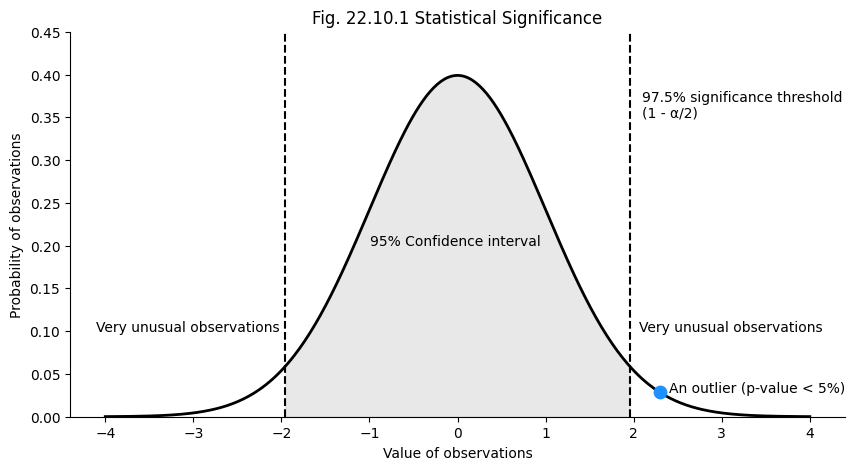

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create x range and PDF
x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

# Confidence interval boundaries (95%)
left = norm.ppf(0.025)     # -1.96
right = norm.ppf(0.975)    # 1.96

# Outlier point (p < 5%)
outlier_x = 2.3
outlier_y = norm.pdf(outlier_x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, linewidth=2, color='black')

# Vertical lines for CI boundaries
plt.axvline(left, color='black', linestyle='--')
plt.axvline(right, color='black', linestyle='--')

# Shade confidence interval region
ci_mask = (x >= left) & (x <= right)
plt.fill_between(x[ci_mask], y[ci_mask], color='lightgray', alpha=0.5)

# Outlier point
plt.scatter(outlier_x, outlier_y, color='dodgerblue', s=80, zorder=5)

# Text annotations
plt.text(-4.1, 0.10, "Very unusual observations", ha='left')
plt.text(right + 0.1, 0.10, "Very unusual observations", ha='left')
plt.text(-0.02, 0.2, "95% Confidence interval", ha='center')
plt.text(right + 0.13, 0.35, "97.5% significance threshold\n(1 - α/2)", ha='left')
plt.text(outlier_x + 0.1, outlier_y - 0.0001, "An outlier (p-value < 5%)", ha='left')

# Axes labels
plt.xlabel("Value of observations")
plt.ylabel("Probability of observations")

# Remove top/right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylim(0, 0.45)
plt.title("Fig. 22.10.1 Statistical Significance")
plt.show()


## 22.10.2.2. Statistical Power

$$
\text{statistical power} 
= 1 - \beta 
= 1 - P(\text{fail to reject } H_0 \mid H_0 \text{ is false}).
\tag{22.10.6}
$$

Recall:
1. **Type I error**: reject $H_0$ when it is true. 
2. **Type II error**: fail to reject $H_0$ ​when it is false. 
3. _Type II error_ probability is denoted $\beta$.

Then, more detailed of $(22.10.6)$ 
$$
\text{statistical power} 
= 1 - \beta 
= 1 - P(\text{fail to reject } H_0 \mid H_0 \text{ is false})
= P(\text{reject } H_0 \mid H_0 \text{ is false})
$$

Conceptually,
- Statistical power also called "sensitivity" in 
$\text{diagnostic testing, sensitivity} = P(\text{test positive } \mid \text{ condition present})$. 

- Saying "80% is a commonly used statistical power threshold" is standard heuristic advice (not a theorem but a common convention)

However, 
- Power is *not a single number*; it’s a function of the true parameter value under the alternative (effect size), sample size, significance level, and the chosen test statistic. 

- [1] treats "statistical power" as a scalar for a given effect size and test.

## 22.10.2.3. Test Statistic

Denote,
- A **test statistic** $T(x)$ is described as a scalar summary of the sample data, used to distinguish between hypotheses.

- Example: use the **sample mean** as a test statistic when comparing population means.

- Different choices of test statistic can give different **statistical power**.

- Under $H_0$, $T(X)$ *"will follow, at least approximately, a common probability distribution such as a normal distribution."*

- If known the distribution, it could *"reject the null hypothesis if our statistic is far outside the range that we would expect,"* which *"leads us to the notion of $p$-values."*

Standardizing,

- A test statistic is a **function of the data**, usually written $T(X_1, \ldots, X_n)$ or $T(X)$, not $T(x)$ (lowercase suggests a fixed realized value).

- *"$T(X)$ (the distribution of the test statistic ...)"* is imprecise: $T(X)$ is the **random variable**; its **distribution** is a separate object. The notation is sloppy in this part with previous part.

- Rejected the null hypothesis when the observed value of the test statistic lies in the pre-specified rejection region, corresponding to values that are very unlikely under the null distribution

## 22.10.2.4. $p$-value

$$
\text{$p$-value} = P_{H_0}\big(T(X) \ge T(x)\big) \tag{22.10.7} 
$$
Noted that,
- If the $p$-value ≤ significance level $\alpha$, reject $H_0$. 

- Otherwise, conclude that "lack evidence to reject" $H_0$ .

- For a given distribution, the rejection region is the set of points with 𝑝 $p$-value < $\alpha$.

However, $(22.10.7)$ is correct only for the right-tailed test. For the left-tailed test demonstrate as follow,

$$
\text{$p$-value} = P_{H_0}\big(T(X) \le T(x)\big) 
$$

For more typically or for an equivalent symmetric-tailed construction as follow

$$
\text{$p$-value} = P_{H_0}\big(\mid T(X)\mid\ \ge \ \mid T(x) \mid \big) 
$$

## 22.10.2.5. One-side Test and Two-sided Test

#### **One-sided (one-tailed) test**

#### 1. Hypotheses form **upper-tailed** one-sided: 
- A typical test is

$$
H_0 : \theta \le c 
\qquad\text{vs}\qquad
H_1 : \theta > c
$$

- Rejection region for the test: For significance level $\alpha$, choose a critical value $k$ such that

$$
P_{H_0}(T(X) \ge k) = \alpha .
$$

- Then the rejection region is

$$
R = \{\, t : t \ge k \,\}.
$$

*[All "large" values of $T(X)$ lie in one tail]*


-  Decision rule: With observed statistic $t_{\text{obs}} = T(x)$:

    - If $t_{\text{obs}} \in R$ (e.g., $t_{\text{obs}} \ge k$), **reject $H_0$**.

    - Otherwise, **do not reject $H_0$**.
    
*[Rejection region is on one side of the $H_0$ distribution]*


#### 2. Alternative direction - Hypotheses form **lower-tailed** one-sided: 
- Set the typical test for the opposite inequalities:

$$
H_0 : \theta \ge c 
\qquad\text{vs}\qquad
H_1 : \theta < c .
$$

- Rejection region for the test: For significance level $\alpha$, choose a critical value $k$ such that

$$
P_{H_0}(T(X) \le k) = \alpha .
$$

- Then the rejection region is

$$
R = \{\, t : t \le k \,\}.
$$

*[All "small" values of $T(X)$ lie in one tail]*

- Decision rule: With observed statistic $t_{\text{obs}} = T(x)$:

    - If $t_{\text{obs}} \in R$ (e.g., $t_{\text{obs}} \le k$), **reject $H_0$**.

    - Otherwise, **do not reject $H_0$**.

*[Rejection region is on one side of the $H_0$ distribution]*


####  **Two-sided (two-tailed) test**

1. Hypotheses form: A typical test of a point value $c$ is

$$
H_0 : \theta = c 
\qquad\text{vs}\qquad
H_1 : \theta \ne c .
$$

2. Rejection region for symmetric statistic: Suppose "large positive or negative" values of a standardized statistic $T(X)$ contradict $H_0$. For level $\alpha$, choose $k$ so that

$$
P_{H_0}(|T(X)| \ge k) = \alpha.
$$

3. Then the rejection region is

$$
R = \{\, t : t \le -k \,\} \;\cup\; \{\, t : t \ge k \,\}.
$$

*[Two tails; rejection region on both sides of the distribution]*

4. Decision rule: For observed $t_{\text{obs}}$:

- If $|t_{\text{obs}}| \ge k$, i.e., $t_{\text{obs}} \in R$, **reject $H_0$**.
- Otherwise, **do not reject $H_0$**.

**Noted**
- $c$ is the _hypothesized value of the parameter_ (e.g., population mean).

- $k$ is the _critical value applied to the test statistic_ (e.g., a z-score or t-score).

**Comparative example:** Testing whether a mean equals 10,

$$
H_0 : \theta = 10 
\qquad\text{vs}\qquad 
H_1 : \theta \ne 10.
$$

Here:

- $\theta$ is a population parameter.
- $c = 10$ is the hypothesized parameter value.

A test statistic $T(X)$ might be:

$$
T(X) = \frac{\bar{X} - c}{\sigma / \sqrt{n}} .
$$

Under $H_0$, $T(X)$ follows (approximately) a known distribution such as:

- Standard normal: $N(0,1)$
- Student $t$-distribution
- Chi-square distribution, etc.

To decide rejection, do **not** compare $\bar{X}$ to $c$ directly - compare the **standardized test statistic** to a **critical value** $k$ derived from that distribution.


**Example**

$$
|T(X)| \ge k 
\quad\Longrightarrow\quad 
\text{reject } H_0.
$$

Where:

- For a 5% two-sided Z-test → $k = 1.96$

- For a 5% one-sided Z-test → $k = 1.645$

- For a $t$-test → $k = t_{\alpha/2,\;df}$

$k$ depends on the sampling distribution under $H_0$, not on the hypothesized value $c$.

## 22.10.2.6. General Steps of Hypothesis Testing

*Step-by-step formulation with explicit assumptions*

#### Set-up and notation

- Let $X$ denote the random data (possibly a vector $X = (X_1, \ldots, X_n)$).

- The distribution of $X$ depends on some parameter $\theta$ in a parameter space $\Theta$.

- Testing where $\Theta_0 \cap \Theta_1 = \varnothing$

$$
H_0 : \theta \in \Theta_0 
\qquad\text{vs}\qquad
H_1 : \theta \in \Theta_1,
$$

- Use a **test statistic** $T(X)$ and a **significance level** $\alpha$.


#### General steps of hypothesis testing (methodologically correct order)

1. Formulate the scientific question: Translate the real-world question into a statement about the parameter $\theta$.  

2. Specify the null and alternative hypotheses

$$
H_0 : \theta \in \Theta_0,
\qquad
H_1 : \theta \in \Theta_1,
$$

For example $H_0 : \theta = \theta_0$ vs $H_1 : \theta \ne \theta_0$, or one-sided variants.

3. Choose the significance level $\alpha$ (type I error rate): Decide on an acceptable probability of rejecting a true $H_0$, e.g. $\alpha = 0.05$.

4. Study planning: choose desired power and determine sample size: For a relevant effect size $\delta$ (difference from $H_0$), choose a target power $1 - \beta$ (often 0.8 or 0.9), and solve for a sample size $n$ so that

$$
P_{H_1}(\text{reject } H_0) \ge 1 - \beta
\qquad\text{for } \theta - \theta_0 = \delta.
$$

5. Specify the test statistic and its null distribution

Choose a function $T(X)$ that is sensitive to deviations under $H_1$ (Z-statistic, $t$-statistic, etc.), and determine (exactly or approximately) its distribution under $H_0$.

6. Collect the data: Perform the experiment or sampling to obtain an observed dataset of size $n$.

7. Compute the observed test statistic: Evaluate using the observed data.

$$
t_{\text{obs}} = T(x)
$$

8. Compute the p-value (or compare to critical value)

- Under $H_0$, use the distribution of $T(X)$ to find

$$
p = P_{H_0}(\text{test statistic at least as extreme as } t_{\text{obs}}).
$$

- Equivalently, compare $t_{\text{obs}}$ to a precomputed critical value / rejection region.

9. Make a decision

- If $p \le \alpha$ (or $t_{\text{obs}}$ lies in the rejection region), **reject $H_0$ in favor of $H_1$**.

- If $p > \alpha$, **do not reject $H_0$**  (conclude that the data do not provide strong enough evidence against it).

10. Interpret the result in the substantive context: Translate the statistical outcome (reject / fail to reject) back into the real-world question, noting possible limitations (**sampling noise**, **assumptions**, **possible model misspecification**).



## 22.10.3.2. Interpretation

- $X$ be the data, and $C_n(X)$ a confidence interval procedure such that, for all $\theta$, and $\alpha = 0.05$

$$
P_{\theta}\bigl(\theta \in C_n(X)\bigr) = 0.95.
$$

- **Before data are observed**, $C_n(X)$ is random because it depends on the random sample $X$. Observed data $x$ gets a **realized interval** $C_n(x)$. 

- For any fixed $\theta$, the probability (over repeated samples) that the procedure’s interval contains $\theta$ is

$$
P_{\theta}\bigl(\theta \in C_n(X)\bigr) = 0.95.
$$

- **Interpretation in repeated sampling:**  

If repeated the experiments many times under the same $\theta$, each time computing $C_n(X^{(1)}), C_n(X^{(2)}), \ldots$, then approximately $95\%$ of those intervals would contain the fixed true value $\theta$, and about $5\%$ would miss it.

- **After observing the data once**, obtained a single interval $C_n(x)$. At this point:

   - The randomness has been realized.  
   - The statement "$\theta \in C_n(x)$" is either true or false.  
   - In pure frequentist probability, do **not** assign a probability like "0.95" to this specific event.  

- Therefore, it is **incorrect** (in [1]) to say: "For this particular interval $C_n(x)$, the probability that it contains $\theta$ is 95%." Instead, said: "We used a procedure that, in the long run, produces intervals that cover the true parameter $95\%$ of the time." Which emphasized difference between procedure-level probability and case-specific belief.

- Because coverage is a **frequency property** over many samples, in principle, construct some intervals that strongly suspect **do not** contain $\theta$ (e.g., very strange or deliberately shifted intervals), as long as such events occur at most $5\%$ of the time. The coverage condition still holds.

#### About the three fallacies:

- **Fallacy 1 (narrow ⇒ precise):**

The width of a single interval by itself does not guarantee that the estimator is truly precise; Narrow intervals can result from underestimating variability or using a mis-specified model. **Within a properly calibrated method**, narrower intervals do correspond to greater precision, but one cannot conclude precision just from narrowness alone.

- **Fallacy 2 (values inside the interval are "more likely"):**

The frequentist confidence interval does **not** assign probabilities to parameter values. Only kknow that the **procedure** tends to contain the true $ \theta $ with some frequency. Cannot say:

$
\theta_1 \in C_n(x) \text{ is more probable than } \theta_2 \notin C_n(x)
$

Unless adopted a **Bayesian** inference framework with a prior on $ \theta $. Thus, $\text{no probability distribution over } \theta \text{ in frequentist CI}$

- **Fallacy 3 (probability the realized interval covers $\theta$ is $95\%$):**

Once the interval is observed, the event  
$
\theta \in C_n(x)
$
is fixed. Under the frequentist view, its probability is **either 0 or 1**. The 95% refers to the **long-run success rate of the interval-producing procedure**, not the probability that this **specific** realized interval covers $ \theta $. Hence, $\text{[distinguish long-run frequency from single-case belief]}$

## 22.10.3.3. A Gaussian Example

- The confidence interval for the mean of a Gaussian of unknown mean and variance. As data: $ x_1, \ldots, x_n $ from $ \mathcal{N}(\mu, \sigma^2) $ with unknown $ \mu \in \mathbb{R} $ and $ \sigma^2 > 0 $ . Estimators: mean and variance denoted, 

$$
\hat{\mu}_n = \frac{1}{n} \sum_{i=1}^n x_i, 
\qquad
\hat{\sigma}_n^{\,2} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu}_n)^2
\tag{22.10.9}
$$

Further defined from $(22.10.9)$,
$$
\hat{\sigma}_n^{\,2} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu}_n)^2
\textrm{ ; }
\qquad
\hat{\sigma_n} = \sqrt{\hat{\sigma}_n^{\,2}} 
\tag{11}
$$

- The random variable following a well-known distribution called the *Student's t-distribution on* $n-1$ *degrees of freedom*.

$$
T = \frac{\hat\mu_n - \mu}{\hat\sigma_n/\sqrt{n}}, 
\tag{22.10.10}
$$

- For large $ n $ [1] say $ T $ is approximately standard normal and conclude

$$
P\!\left(
\frac{\hat{\mu}_n - \mu}{\hat{\sigma}_n / \sqrt{n}}
\in [-1.96,\, 1.96]
\right) \;\ge\; 0.95.
\tag{22.10.11}
$$

Then rearranging $(22.10.11)$ by multiplying both sides by $\hat\sigma_n/\sqrt{n}$ and then adding $\hat\mu_n$, obtain: 

$$
P\left(\mu \in \left[\hat\mu_n - 1.96\frac{\hat\sigma_n}{\sqrt{n}}, \hat\mu_n + 1.96\frac{\hat\sigma_n}{\sqrt{n}}\right]\right) \ge 0.95
\tag{22.10.12}
$$

Had found our $95\%$ confidence interval:
$$
\left[\hat\mu_n - 1.96\frac{\hat\sigma_n}{\sqrt{n}}, \hat\mu_n + 1.96\frac{\hat\sigma_n}{\sqrt{n}}\right]
\tag{22.10.13}
$$

Denoted mistakes in the $(22.10.11)$:
If $ T \sim N(0,1) $, then  
$$
P(-1.96 \le T \le 1.96) \approx 0.95, 
$$
not "$ \ge 0.95 $".

If $ T \sim t_{n-1} $ with finite $ n $, then  
$$
P(-1.96 \le T \le 1.96) < 0.95
$$
because the $t$-distribution has heavier tails, so "$ \ge $" is incorrect again.

Therefore, [1] should write "$ \approx 0.95 $" when using the normal approximation,

- Hence, 
$$
P\!\left(
\frac{\hat{\mu}_n - \mu}{\hat{\sigma}_n / \sqrt{n}}
\in [-1.96,\, 1.96]
\right) \;\approx \; 0.95.
$$

Noted, in the explaination, for large $n$, the $ t_{n-1} $ distribution is close to the standard normal $ N(0,1) $, so  
$$
t_{n-1,0.975} \approx 1.96 
$$

Then, replace 1.96 into $t_{n-1,0.975}$ in general:

1. Under the normal model, it is a standard result that  
$$
T = \frac{\hat{\mu}_n - \mu}{\hat{\sigma}_n / \sqrt{n}} \sim t_{n-1}.
$$

2. Let $ t_{n-1,0.975} $ be the 97.5th percentile of the $ t_{n-1} $ distribution, i.e.  
$$
P\!\left(-t_{n-1,0.975} \le T \le t_{n-1,0.975}\right) = 0.95.
$$

3. Write this probability equivalently:  
$$
P\!\left(-t_{n-1,0.975} \le 
\frac{\hat{\mu}_n - \mu}{\hat{\sigma}_n / \sqrt{n}} 
\le t_{n-1,0.975}\right) = 0.95.
$$

4. Multiply all three parts of the inequality by $\hat{\sigma}_n / \sqrt{n}$ (positive quantity):  
$$
P\!\left(- t_{n-1,0.975} \frac{\hat{\sigma}_n}{\sqrt{n}}
\le \hat{\mu}_n - \mu
\le t_{n-1,0.975} \frac{\hat{\sigma}_n}{\sqrt{n}}
\right) = 0.95
$$

5. Add $\hat{\mu}_n$ to all three parts (monotone transformation; event unchanged):  
$$
P\!\left(
\hat{\mu}_n - t_{n-1,0.975} \frac{\hat{\sigma}_n}{\sqrt{n}}
\le \mu
\le
\hat{\mu}_n + t_{n-1,0.975} \frac{\hat{\sigma}_n}{\sqrt{n}}
\right) = 0.95.
$$

6. Recognize the random interval  
$$
C_n(X) = 
\left[
\hat{\mu}_n - t_{n-1,0.975} \frac{\hat{\sigma}_n}{\sqrt{n}},
\;
\hat{\mu}_n + t_{n-1,0.975} \frac{\hat{\sigma}_n}{\sqrt{n}}
\right].
$$

Then line (5) is exactly  
$$
P_\mu\bigl(\mu \in C_n(X)\bigr) = 0.95
\quad\text{for all } \mu.
$$

This is the exact **95% CI for $\mu$** under the normal model with unknown variance.


### Large-Sample Approximation with 1.96

7. For large $n$, the $ t_{n-1} $ distribution is close to the standard normal $ N(0,1) $, so  
$$
t_{n-1,0.975} \approx 1.96.
$$

8. Using this approximation, replace $t_{n-1,0.975}$ with $1.96$ in the interval in step (6), obtaining the commonly-used approximate 95% CI:
$$
C^{\mathrm{approx}}_n(X) = 
\left[
\hat{\mu}_n - 1.96\, \frac{\hat{\sigma}_n}{\sqrt{n}},
\;
\hat{\mu}_n + 1.96\, \frac{\hat{\sigma}_n}{\sqrt{n}}
\right].
$$

9. Under the normal approximation,  
$$
P_\mu\bigl(\mu \in C^{\mathrm{approx}}_n(X)\bigr) \approx 0.95.
$$

Conclusion, the coverage is approximately 95% for large $n$.


## Reference 

[1] D. Zhang, Z. C. Lipton, M. Li, and A. J. Smola, "Statistics," 
    in *Mathematics for Deep Learning*, d2l.ai. 
    Available: https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/statistics.html

[2] C. J. Geyer, "Models, Parameters, and Statistics," 
     University of Minnesota, Minneapolis, MN, USA. 
     Available: https://www.stat.umn.edu/geyer/old/5102/n2.pdf

